In [1]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder as OHE
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

## Load Data

In [2]:
# Load updated df
df = pd.read_csv("../Data/df_updated.csv")

In [3]:
df.shape

(5265, 33)

In [4]:
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Skin symptoms,1,1,1,1,1
Season born,1.0,2.0,2.0,1.0,4.0
Heating system_house,1.0,2.0,1.0,2.0,1.0
House _now,NaN,2.0,3.0,4.0,3.0
House_before,NaN,3.0,1.0,NaN,1.0
Clean_house,2.0,2.0,2.0,2.0,2.0
Puppy_dewormed,1.0,1.0,1.0,1.0,1.0
Puppy_vaccinated,1.0,1.0,1.0,1.0,1.0
Dam_dewormed_prebirth,NaN,1.0,1.0,1.0,1.0


In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df.drop([ 'Obey', 'Reps_lower', 'Reps_upper', 'Height_low_inches', 'Height_high_inches', 'Weight_low_lbs', 'Weight_high_lbs'], axis=1, inplace=True)

In [7]:
df.rename(columns = {'Skin symptoms':'Skin_symptoms'}, inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5265 entries, 0 to 5264
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Skin_symptoms             5265 non-null   int64  
 1   Season born               5140 non-null   float64
 2   Heating system_house      4762 non-null   float64
 3   House _now                5238 non-null   float64
 4   House_before              3930 non-null   float64
 5   Clean_house               5239 non-null   float64
 6   Puppy_dewormed            4998 non-null   float64
 7   Puppy_vaccinated          5080 non-null   float64
 8   Dam_dewormed_prebirth     3524 non-null   float64
 9   Dam_vaccinated_prebirth   5265 non-null   int64  
 10  Gender                    5124 non-null   float64
 11  Over 50% white            4991 non-null   float64
 12  Other animals             5265 non-null   int64  
 13  Other dogs                5265 non-null   int64  
 14  Born in 

Given that some features are categorical (in this case most features) we will need to transform/encode these to be used in some machine learning models. We will use dummy encoding where each possible value of a feature becomes a new column, and a 1 is placed in that column if the data instance (a row of the data) contained that value, and a 0 is placed in that column otherwise.

In [9]:
categorical_features = ['Season born',
                        'Heating system_house',
                        'House _now',
                        'House_before',
                        'Clean_house',
                        'Puppy_dewormed',
                        'Puppy_vaccinated',
                        'Dam_dewormed_prebirth',
                        'Dam_vaccinated_prebirth',
                        'Gender',
                        'Over 50% white',
                        'Other animals',
                        'Other dogs',
                        'Born in owner family',
                        'Does the dog have a yard',
                        'Bcs_under 2 mo', 
                        'Outside_under 2 mo',
                        'Outside a day_under 5mo',
                        'Skin symptoms_dam',
                        'Vet diagnosis']

In [10]:
df1 = pd.get_dummies(df, columns = categorical_features, dummy_na=True).copy()
print('The data have ', df1.shape[0], ' rows and ', df1.shape[1], ' columns\n')
print('column names: \n')
print('\n'.join(list(df1.columns)))

The data have  5265  rows and  81  columns

column names: 

Skin_symptoms
Age
Breed_En
Classification
Category
Season born_1.0
Season born_2.0
Season born_3.0
Season born_4.0
Season born_nan
Heating system_house_1.0
Heating system_house_2.0
Heating system_house_nan
House _now_1.0
House _now_2.0
House _now_3.0
House _now_4.0
House _now_nan
House_before_1.0
House_before_2.0
House_before_3.0
House_before_4.0
House_before_nan
Clean_house_1.0
Clean_house_2.0
Clean_house_nan
Puppy_dewormed_0.0
Puppy_dewormed_1.0
Puppy_dewormed_nan
Puppy_vaccinated_0.0
Puppy_vaccinated_1.0
Puppy_vaccinated_nan
Dam_dewormed_prebirth_0.0
Dam_dewormed_prebirth_1.0
Dam_dewormed_prebirth_nan
Dam_vaccinated_prebirth_0.0
Dam_vaccinated_prebirth_1.0
Dam_vaccinated_prebirth_nan
Gender_1.0
Gender_2.0
Gender_nan
Over 50% white_1.0
Over 50% white_2.0
Over 50% white_nan
Other animals_1.0
Other animals_2.0
Other animals_nan
Other dogs_1.0
Other dogs_2.0
Other dogs_nan
Born in owner family_1.0
Born in owner family_2.0
Born 

In [11]:
#Define X
X = df1.drop(columns = ['Skin_symptoms'])
print("X: ", type(X), X.shape)

X:  <class 'pandas.core.frame.DataFrame'> (5265, 80)


In [12]:
#Define y
y = df1['Skin_symptoms']
print("y: ", type(y), y.shape)

y:  <class 'pandas.core.series.Series'> (5265,)


In [28]:
#Performing train/test split on (X/y) with stratify to try to preserve the proportions among the classes.
Xlrstrat, Xtestlrstrat, ylrstrat, ytestlrstrat = train_test_split(X, y, random_state = 2)
print('Training split has ', Xlrstrat.shape[0], ' rows\n',
      'and the corresponding labels have an equal number of values.', 
      '(' + str(len(ylrstrat))+ ')')
print('Test split has ', Xtestlrstrat.shape[0], ' rows\n',
      'and the corresponding labels have an equal number of values.', 
      '(' + str(len(ytestlrstrat)) + ')')

Training split has  3948  rows
 and the corresponding labels have an equal number of values. (3948)
Test split has  1317  rows
 and the corresponding labels have an equal number of values. (1317)


In [29]:
names_list = ['Breed_En', 'Classification', 'Category']
names_train = Xlrstrat[names_list]
names_test = Xtestlrstrat[names_list]
Xlrstrat.drop(columns=names_list, inplace=True)
Xtestlrstrat.drop(columns=names_list, inplace=True)
Xlrstrat.shape, Xtestlrstrat.shape

((3948, 77), (1317, 77))

In [30]:
X_age_mean = Xlrstrat['Age'].mean()
X_age_mean

3.9190195071868583

In [31]:
Xlrstrat['Age'] = Xlrstrat['Age'].fillna(X_age_mean)
Xtestlrstrat['Age'] = Xtestlrstrat['Age'].fillna(X_age_mean)

Given that the split parameter was not included, the train_test_split is 75%/25% 

In [32]:
clf = LogisticRegression(solver = 'newton-cg', max_iter = 500)

In [33]:
clf.fit(Xlrstrat, ylrstrat) 

LogisticRegression(max_iter=500, solver='newton-cg')

In [34]:
y_predict_test = clf.predict(Xtestlrstrat)
y_predict_training = clf.predict(Xlrstrat)

In [35]:
print("[Test] Accuracy score (y_predict_test, ytestlrstrat):",
      f'{accuracy_score(y_predict_test, ytestlrstrat):.2f}')

[Test] Accuracy score (y_predict_test, ytestlrstrat): 1.00


In [36]:
print("[Training] Accuracy score: (ylrstrat, y_predict_training)", 
      f'{accuracy_score(ylrstrat, y_predict_training):.2f}')

[Training] Accuracy score: (ylrstrat, y_predict_training) 1.00


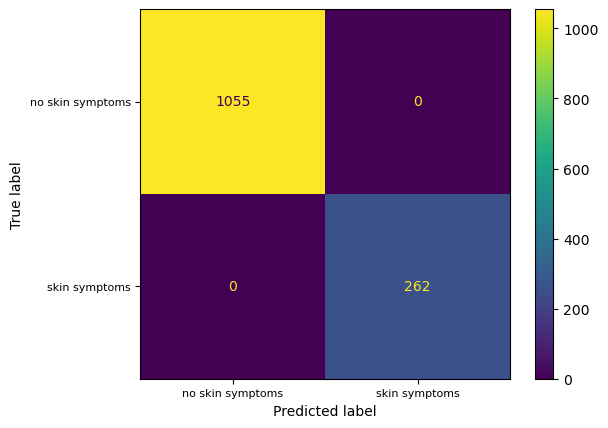

In [37]:
#Visualizing predictions
cm = confusion_matrix(ytestlrstrat, y_predict_test, labels = clf.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['no skin symptoms', 'skin symptoms'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['no skin symptoms', 'skin symptoms'], fontsize = 8)
ax.set_yticklabels(labels = ['no skin symptoms', 'skin symptoms'], fontsize = 8)
display_cm.plot(ax = ax)

In [25]:
print(classification_report(ylrstrat, y_predict_training))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3248
           2       1.00      1.00      1.00       700

    accuracy                           1.00      3948
   macro avg       1.00      1.00      1.00      3948
weighted avg       1.00      1.00      1.00      3948



In [26]:
print(classification_report(ytestlrstrat, y_predict_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1084
           2       1.00      1.00      1.00       233

    accuracy                           1.00      1317
   macro avg       1.00      1.00      1.00      1317
weighted avg       1.00      1.00      1.00      1317



## Summary 
I have questions  